In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# Load dataset: 1.Get data from the database with the given credentials.
df = pd.read_csv('/content/CDA_csat_data_cleaned.csv')
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,Call_Day,reason,city,state,channel,response_time,call_duration_in_minutes,call_center
0,AAA-03321706-1-866834-I1,Andrea Bailiss,Negative,3,10/15/2020,15,Payments,Charlotte,North Carolina,Call-Center,Within SLA,12,Baltimore/MD
1,AAB-04923282-m-405308-yW,Othilie Strand,Negative,0,10/22/2020,22,Service Outage,Nashville,Tennessee,Web,Below SLA,5,Baltimore/MD
2,AAB-23102945-b-065985-xp,Sondra Bearman,Very Positive,0,10-06-2020,6,Billing Question,Salem,Oregon,Call-Center,Above SLA,9,Chicago/IL
3,AAB-64454903-y-396859-bx,Gibb Augustine,Positive,0,10/15/2020,15,Service Outage,Littleton,Colorado,Web,Within SLA,20,Los Angeles/CA
4,AAB-68191584-X-296651-JM,Hope Verissimo,Positive,0,10-02-2020,2,Billing Question,Fresno,California,Web,Within SLA,43,Chicago/IL


In [115]:
# Convert timestamp to datetime
df['call_timestamp'] = pd.to_datetime(df['call_timestamp'], errors='coerce')

In [116]:

# Extract just the date
df['call_date'] = df['call_timestamp'].dt.date

# Group by date and count number of calls per day
daily_calls = df.groupby('call_date').size()


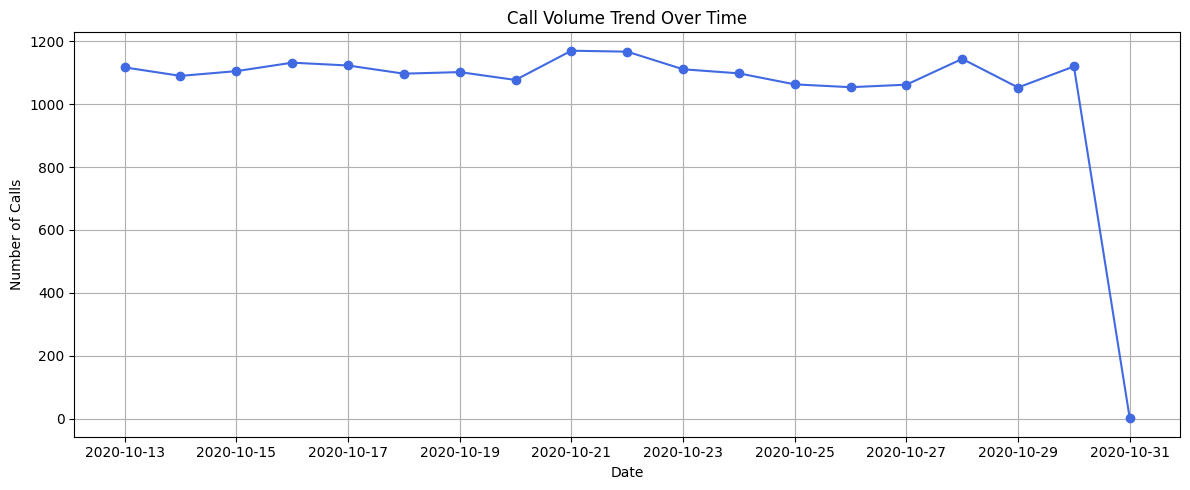

In [117]:
# Plot the line chart: 2.Create line Chart for the call trends.
plt.figure(figsize=(12, 5))
daily_calls.plot(kind='line', marker='o', color='royalblue')
plt.title('Call Volume Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()


In [118]:
# Count number of calls per channel
channel_counts = df['channel'].value_counts()
print(channel_counts)


channel
Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: count, dtype: int64


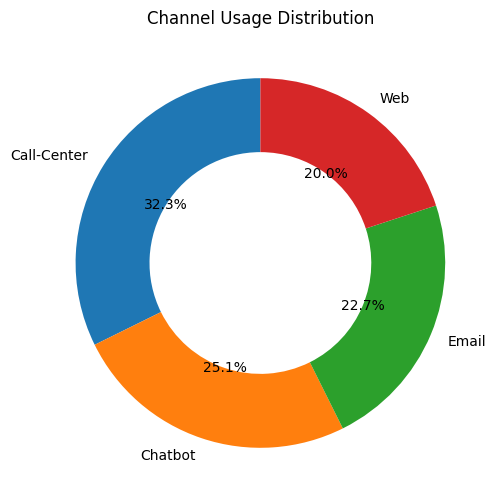

In [119]:
# Plot the doughnut chart: 3.Create a doughnut chart for the Call channel.
plt.figure(figsize=(6,6))
plt.pie(channel_counts,
        labels=channel_counts.index,
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'width': 0.4})
plt.title('Channel Usage Distribution')
plt.show()


/tmp/ipython-input-2370722900.py:10: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


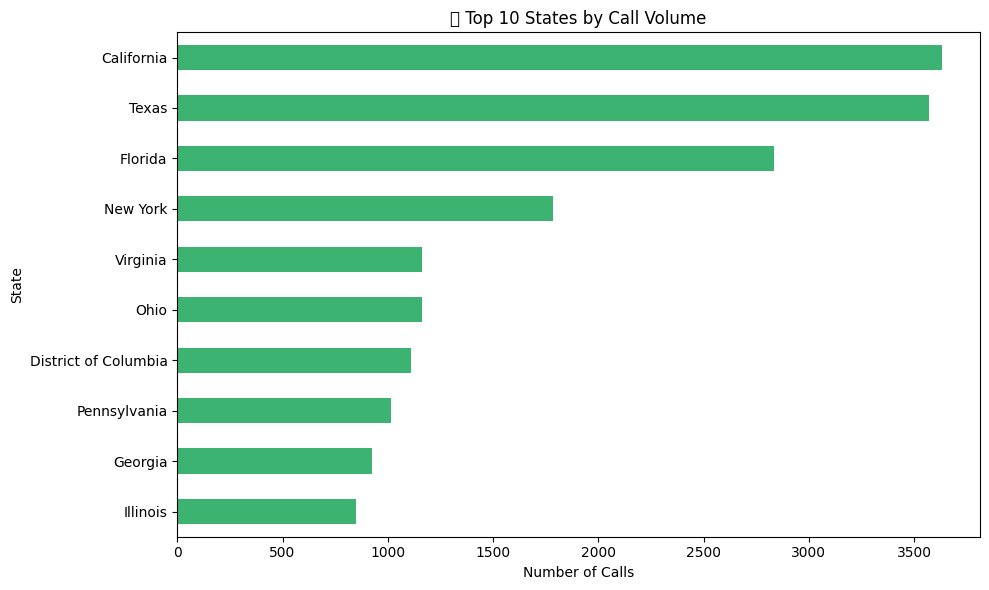

In [120]:
# Map of all states chart: 4.Count calls per state
state_counts = df['state'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.head(10).plot(kind='barh', color='mediumseagreen')
plt.title('📍 Top 10 States by Call Volume')
plt.xlabel('Number of Calls')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [120]:
#5.Create a column chart for the reason of calling.